In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pickle

# plt.rcParams["font.family"]

  Using cached https://mirrors.aliyun.com/pypi/packages/7e/07/4b361d6d0f4e08942575f83a11d33f36897e1aae4279046606dd1808778a/matplotlib-3.1.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://mirrors.aliyun.com/pypi/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://mirrors.aliyun.com/pypi/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://mirrors.aliyun.com/pypi/packages/5d/bc/1e58593167fade7b544bfe9502a26dc860940a79ab306e651e7f13be68c2/pyparsing-2.4.6-py2.py3-none-any.whl
  Using cached https://mirrors.aliyun.com/pypi/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://mirrors.aliyun.com/pypi/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
 

In [ ]:
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

[[11 10  8  9  7  5  2  6  4  1  3  0]
 [11 10  9  5  1  2  8  4  7  0  6  3]]


IndexError: index 11 is out of bounds for axis 0 with size 2

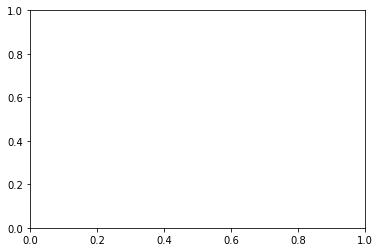

In [269]:
fig, ax = plt.subplots()
lasso = np.array([0.8750, 0.8125, 0.4219, 0.8438,\
                  0.5000, 0.2891, 0.4688, 0.2617, 0.1406,0.2441, 0.0273, 0.0098])
# ours = np.array([0.5,0.406,0.406,0.6485,0.46875,0.3828,\
#                  0.6328,0.4765,0.4257,0.3183,0.1054,0.0781])

x = np.vstack([lasso, ours])
ind = np.argsort(x,axis=1)
print(ind)
# x = (x.reshape([2,-1]))
# x = (x / np.linalg.norm(x)).reshape([2,-1])

# im = ax.imshow(x)
# ours 0.125

# for i in range(1):
#     for j in range(lasso.shape[0]):
#         text = ax.text(j,i,int(x[j,i]*100)/100,ha="center",va="center",color="white")


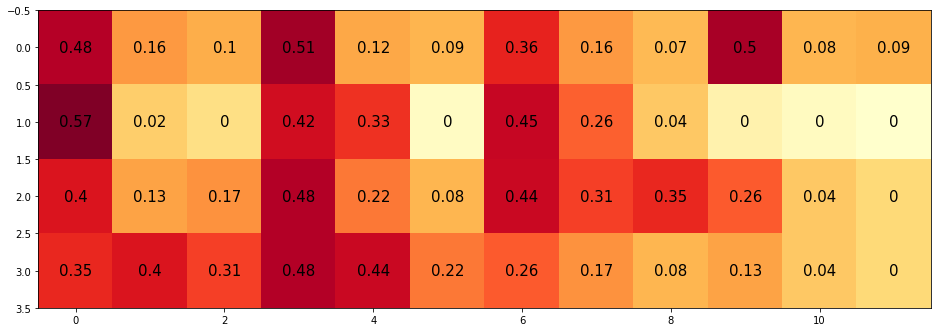

In [3]:
fig, ax = plt.subplots(figsize=[16,9])
# T_grads 1st 100 iter's Mean ; 
# DIR: /home/zhaotianchen/code/pt_adv/logs/res18/plan1/pretrain/budget_0.125'
grads = np.array([-0.21046494, -0.07042833, -0.04646142, -0.22305243, -0.05327817,
-0.03906904, -0.15812522, -0.07029 , -0.03422718, -0.21947866,
-0.03751051, -0.04256288])
grads = (grads / np.linalg.norm(grads))
grads = (-1)*grads


# DIR: /home/zhaotianchen/code/pt_adv/logs/res18/lasso/lambda/lambda_5e-03
# lasso = [0.8750, 0.8125, 0.4219, 0.8438,\
#                   0.5000, 0.2891, 0.4688, 0.2617, 0.1406,0.2441, 0.0273, 0.0098]

# DIR /home/zhaotianchen/code/pt_adv/logs/res18/lasso/lambda/lambda_1e-02
# 10.2% FLOPs
lasso = [0.3438, 0.3750, 0.2812, 0.9375, 0.3750, 0.2109, 0.2773, 0.1328, 
         0.1133,0.1172, 0.0488, 0.0078]

# Ours
x = [0.357, 0.273, 0.278, 0.543, 0.289, 0.267, 0.503, 0.319, 0.319, 0.308, 0.159, 0.151]
x_ = x
x0 = 10*np.log2(x)

# Sensitivity
sens = [55.820,1.220,0.810,20.410,10.900,0.310,24.050,6.260,1.350,0.430,0.320, 0.270]    

ind = np.argsort(x)
for i,j in enumerate(ind):
    x[j] = i
    

ind = np.argsort(lasso)
for i,j in enumerate(ind):
    lasso[j] = i

# plt.plot(x, label="rank")

x = np.array(x).reshape([1,-1])
x = (x / np.linalg.norm(x))
lasso = np.array(lasso).reshape([1,-1])
lasso = (lasso / np.linalg.norm(lasso))
sens = np.log2(sens)
sens = (sens / np.linalg.norm(sens))
x0 = np.vstack([grads,sens,x,lasso])
# im = ax.imshow(x0, cmap="GnBu")
im = ax.imshow(x0, cmap="YlOrRd")

for i in range(12):
    for j in range(4):
        text = ax.text(i,j,int(x0[j,i]*100)/100 if int(x0[j,i]*100)/100 > 0 else 0 ,ha="center",va="center",color="black",fontsize=15)
        

SyntaxError: invalid syntax (<ipython-input-65-5da915dd6342>, line 1)

In [125]:
np.arange(-0.3,0.3,0.1)

array([-3.00000000e-01, -2.00000000e-01, -1.00000000e-01,  5.55111512e-17,
        1.00000000e-01,  2.00000000e-01])

In [66]:
# At Begin
sens = np.array([25.820,1.220,0.810,20.410,10.900,0.310,24.050,6.260,1.350,0.430,0.320, 0.270] )
grads = np.array([-0.21046494, -0.07042833, -0.04646142, -0.22305243, -0.05327817,
-0.03906904, -0.15812522, -0.07029 , -0.03422718, -0.021947866,
-0.03751051, -0.04256288])

# After 40 Epoch
sens = (sens - np.mean(sens)) / np.std((np.abs(sens)))
grads = (grads - np.mean(grads)) / np.std((np.abs(grads)))
print(sens, grads)



[ 1.88075559 -0.66965578 -0.71216263  1.31987244  0.33392073 -0.76400026
  1.69725038 -0.14713247 -0.65617799 -0.75155923 -0.76296351 -0.76814727] [-1.85572367  0.19836046  0.54991174 -2.04035941  0.44992233  0.6583446
 -1.08799451  0.20038951  0.72936594  0.9094813   0.68120542  0.60709628]


[0.28600003 0.03666812 0.02579954 0.34399518 0.02851259 0.02314835
 0.1327228  0.0365938  0.02156135 0.01800747 0.02262517 0.02436559] [0.30634387 0.02391    0.02291496 0.17483192 0.06522699 0.02175737
 0.25498456 0.04031889 0.02423444 0.02202974 0.02177993 0.02166732]


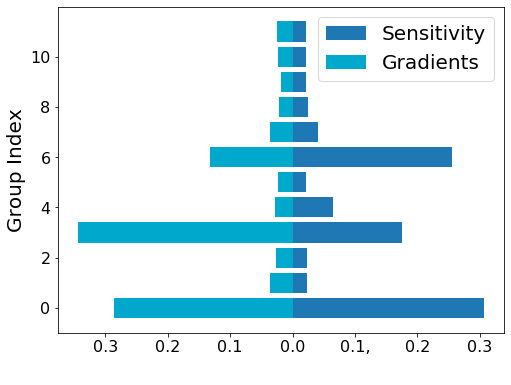

In [89]:
def softmax(x, tau):
    """ Returns softmax probabilities with temperature tau
        Input:  x -- 1-dimensional array
        Output: s -- 1-dimensional array
    """
    e_x = np.exp(x / tau)
    return e_x / e_x.sum()

# At Begin
sens = np.array([25.820,1.220,0.810,20.410,10.900,0.310,24.050,6.260,1.350,0.430,0.320, 0.270] )
grads = np.array([-0.21046494, -0.07042833, -0.04646142, -0.22305243, -0.05327817,
-0.03906904, -0.15812522, -0.07029 , -0.03422718, -0.021947866,
-0.03751051, -0.04256288])

grads = np.abs((grads / np.linalg.norm(grads)))
sens = np.abs((sens / np.linalg.norm(sens)))
grads = softmax(grads, np.std(grads))
sens = softmax(sens, np.std(sens))
print (grads,sens)
fig, ax = plt.subplots(figsize=[8.,6])
cmap0 = plt.cm.Blues
# norm = matplotlib.colors.Normalize(vmin=1.5, vmax=4.5)
cmap1 = plt.cm.Reds
# color="#0d9cf5   color="#ff9900"
horiz_bars = ax.barh(range(sens.shape[0]),sens, align='center',
                     label="Sensitivity")
horiz_bars = ax.barh(range(sens.shape[0]),(-1)*grads, align='center',
                     label="Gradients",color="#00a8cc")
plt.xticks(np.arange(-0.3,0.4,0.1),['0.3','0.2','0.1','0.0','0.1,','0.2','0.3'],fontsize=16)
plt.yticks(fontsize=16)
ax.legend(fontsize=20)
plt.xlabel(" ", fontsize=20,horizontalalignment='center')
plt.ylabel("Group Index",fontsize=20)
plt.savefig("sens_grad.pdf")

[1. 2. 3. 4. 5.] [-5. -4. -3. -2. -1.]


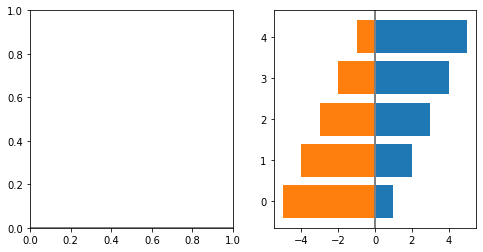

In [18]:

x = np.arange(5)
y1 = np.array([1.,2.,3.,4.,5.])
y2 = np.array([-5.,-4.,-3.,-2.,-1.])
fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

print(y1,y2)
# vert_bars = axes[0].bar(x, y, color='lightblue', align='center')
horiz_bars = axes[1].barh(x, y1, align='center')
horiz_bars = axes[1].barh(x, y2, align='center')

# I'll also introduce axhline & axvline to draw a line all the way across the axes
# This can be a quick-n-easy way to draw an axis "spine".
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

plt.show()

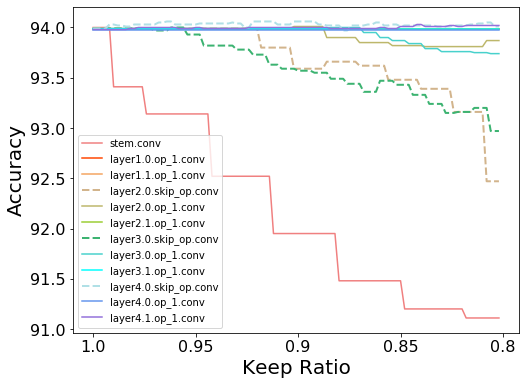

In [244]:
import torch
from cycler import cycler
from mpltools import color

cm = plt.get_cmap('Paired')

sensitivity_dict = torch.load("./data/sens.t7")
fig,ax = plt.subplots(figsize=[8.,6.])


NUM_COLORS = len(sensitivity_dict)
colors = ["lightcoral","orangered","sandybrown",\
          "tan","darkkhaki","yellowgreen",\
         "mediumseagreen","mediumturquoise","cyan",\
         "powderblue","cornflowerblue","mediumpurple"]


for idx, name in enumerate(sensitivity_dict):
    # ax.set_prop_cycle(color=[cm(float(idx) / NUM_COLORS + 0.3 ) for i in range(NUM_COLORS)])
    # ax.set_prop_cycle(color=colors)
    if "stem" in name:
        acc = []
        for i in sensitivity_dict[name]:
            acc.append(i[0])
        acc = np.array(acc)
        acc[:5]  = 94.0
        ax.plot(acc, label=name, linewidth=1.5,color=colors[idx])
    elif "skip" in name:
        acc = []
        for i in sensitivity_dict[name]:
            acc.append(i[0])
        ax.plot(acc, label=name, linestyle="--",linewidth=2,color=colors[idx])
    else:
        acc = []
        for i in sensitivity_dict[name]:
            acc.append(i[0])
        ax.plot(acc, label=name, linewidth=1.5,color=colors[idx])
        
plt.legend(fontsize=10)
plt.xticks(range(0,125,25), [1.00, 0.95, 0.9, 0.85, 0.80],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Keep Ratio",fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.savefig("steps.pdf")

In [18]:
# ResNet18 Results
d = {}
d["Ours"] = [[ 94.2, 93.6, 93.0,91.58,89.9],[0.3374, 0.1982, 0.12112,0.04063,0.02616]]
d["Morph"] = [[93.5,91.83,87.05],[0.62,0.08182,0.0329]]
d["Lasso"] = [[92.47,90.4,86.2],[0.5,0.25,0.11]]
d["TAS"] = [[92.88],[0.45]]
d["FPGM"] = [[91.09],[0.4]]
d["SFP"] = [[91.9,90.83],[0.5,0.4]]

# Res20
d = {}
BASELINE = 92.17
d["Ours"] = [[92.1,91.3,90.24],[0.74,0.501,0.325]]
d["Lasso"] = [[91.08,89.78,89.06],[0.738,0.518,0.346]]
d["Morph"] = [[90.64,90.1,88.72],[0.749,0.471,0.305]]
d["Variational"] = [[91.66],[0.835]]
d["SFP"] = [[90.83],[0.578]]
d["FPGM"] = [[91.09],[0.578]]
d["LCCL"] = [[91.68],[0.64]]


# ResNet50
d = {}
# d["baseline"] = 
d["Ours"] = [[93.84,93.8,93.73,93.41,92.28],[0.248,0.1396,0.07835,0.0494,0.02466]]
d["Morph"] = [[93.49,93.4,91.2,89.5],[0.621,0.2107,0.1043,0.0301]]
d["Lasso"] = [[92.79,91.2,85.67],[0.5448,0.2608,0.1143]]
d["TAS"] = [[93.69],[0.527]]
d["FPGM"] = [[93.49],[0.526]]
d["SFP"] = [[93.36],[0.526]]
d["AMC"] = [[91.9],[0.5]]
d["LCCL"] = [[92.81],[0.379]]
d["Variational"] = [[91.66],[0.8]]
d["LeGR"] = [[93.4,93.6,93.79],[0.5,0.6,0.7]]

# ResNet56
BASELINE = 93.12
d["Ours"] = [[93.08,92.91,92.2],[0.707,0.478,0.326]]
d["Lasso"] = [[92.06,89.78,89.06],[0.69,0.45,0.38]]
d["Morph"] = [[91.71,90.1,88.72],[0.692,0.519,0.397]]
d["Variational"] = [[92.26],[0.797]]
d["PFEC"] = [[91.3],[0.747]]
d["AMC"] = [[91.9],[0.5]]
d["CP"] = [[91.8],[0.5]]
d["SFP"] = [[92.26],[0.474]]
d["FPGM"] = [[92.93],[0.474]]
d["LCCL"] = [[92.8],[0.621]]

# vgg16
d = {}
BASELINE = 92.5
d["Ours"] = [[92.76,92.25,91.8],[0.497,0.2207,0.1168]]
d["Morph"] = [[91.8,91.2,89.5],[0.574,0.281,0.103]]
d["Lasso"] = [[92.24,91.6,89.1],[.543,.266,.084]]

# Mob
d = {}
BASELINE = 92.7
d["Ours"] = [[92.67,92.39,92.0],[0.489,0.2489,0.1202]]
d["Morph"] = [[92.8,91.7,91.1],[0.468,0.299,0.1676]]
d["Lasso"] = [[92.14,90.06,86.6],[0.425,0.186,0.116]]





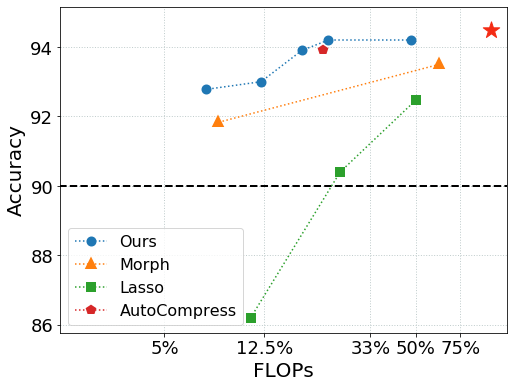

In [20]:
# # ResNet18 Results
# d = {}
# # d["Ours"] = [[ 94.2, 93.6, 93.0,91.6,89.9],[0.5, 0.25, 0.125,0.0493,0.02616]]
# d["Ours"] = [[ 93.9, 93.6, 93.0,91.6,89.9],[0.5, 0.25, 0.125,0.0493,0.02616]]
# d["Morph"] = [[93.5,91.83,87.05],[0.62,0.08182,0.0329]]
# d["Lasso"] = [[92.47,90.4,86.2],[0.5,0.25,0.11]]


# ResNet50
# d = {}
# BASELINE = 94.0
# d["Ours"] = [[ 94.2, 93.6, 93.0,91.58,89.9],[0.3374, 0.1982, 0.12112,0.04063,0.02616]]
# d["Morph"] = [[94.4,91.83,87.05],[0.5,0.08182,0.0329]]
# d["Lasso"] = [[92.47,90.4,86.2],[0.5,0.25,0.11]]



# Res20
# d = {}
# BASELINE = 92.17
# d["Ours"] = [[92.1,91.3,90.24],[0.74,0.501,0.325]]
# d["Lasso"] = [[91.08,89.78,89.06],[0.738,0.518,0.346]]
# d["Morph"] = [[90.64,90.1,88.72],[0.749,0.471,0.305]]
# d["Variational"] = [[91.66],[0.835]]
# d["SFP"] = [[90.83],[0.578]]
# d["FPGM"] = [[91.09],[0.578]]
# d["LCCL"] = [[91.68],[0.64]]



# # ResNet56
# d = {}
# BASELINE = 93.12
# d["Ours"] = [[93.08,92.91,92.2],[0.707,0.478,0.326]]
# d["Lasso"] = [[92.06,89.78,89.06],[0.69,0.45,0.38]]
# d["Morph"] = [[91.71,90.1,88.72],[0.692,0.519,0.397]]
# d["Variational"] = [[92.26],[0.797]]
# d["PFEC"] = [[91.3],[0.747]]
# d["AMC"] = [[91.9],[0.5]]
# d["CP"] = [[91.8],[0.5]]
# d["SFP"] = [[92.26],[0.474]]
# d["FPGM"] = [[92.93],[0.474]]
# d["LCCL"] = [[92.8],[0.621]]



# ResNet18 Results
d = {}
BASELINE = 94.5
d["Ours"] = [[ 94.2,94.2, 93.90, 93.0,92.78],[0.48,0.2246, 0.176, 0.12112,0.0734]]
d["Morph"] = [[93.5,91.83],[0.62,0.08182]]
d["Lasso"] = [[92.47,90.4,86.2],[0.5,0.25,0.11]]
d["AutoCompress"] = [[93.91],[0.2128]]

# # vgg16
# d = {}
# BASELINE = 93.48
# d["Ours"] = [[93.32,93.26,90.16],[0.497,0.3085,0.049]]
# d["Morph"] = [[91.8,91.2,89.5],[0.574,0.281,0.103]]
# d["Lasso"] = [[92.24,91.6,89.1],[.543,.266,.084]]
# d["AutoCompress"] = [[93.22,88.78],[0.3225,0.0714]]

# MobileNet
# d = {}
# BASELINE = 92.7
# d["Ours"] = [[92.67,92.39,92.0],[0.489,0.2489,0.1202]]
# d["Morph"] = [[92.8,91.7,91.1],[0.468,0.299,0.1676]]
# d["Lasso"] = [[92.14,90.06,86.6],[0.425,0.186,0.116]]


fig, ax = plt.subplots(figsize=[8,6])
# fig.suptitle("Scatter Example",c="white")
# plt.title("Scatter Example", c="white")
# ax.set_title("ResNet50", c="white",fontsize=24)
# fig.tight_layout()
ax.grid(b=True, linestyle=':', linewidth='1', color='#c1cdcd')
plt.xlabel("FLOPs",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
# plt.xlim([0,5])
# plt.xticks(np.arange(-5,1),("3.125%","6.25%","12.5%","25%","50%","100%"),fontsize=18)
# plt.xticks(np.arange(-3,1),("12.5%","25%","50%","100%"),fontsize=18)
plt.xticks([np.log2(0.05),np.log2(0.125),np.log2(0.33),np.log2(0.5),np.log2(0.75)],
                    ("5%","12.5%","33%","50%","75%"),fontsize=18)
plt.yticks(fontsize=18)


markers = ["o","^","s","p","d","h","H","8","x","v"]
for idx, name in enumerate(d.keys()):
    # ax.scatter(np.log2(d[name][1]),d[name][0],s=100,marker=markers[idx])
    ax.plot(np.log2(d[name][1]),d[name][0],linestyle=":",label=name,
            mew=4,marker=markers[idx])
ax.scatter(0,BASELINE,marker="*",s=300,alpha=1,color="#f42b14")
ax.legend(fontsize=16,loc="lower left")
# ax.scatter(x,y,color="#3e74c7",marker="s")
# ax.scatter(y,x,color="#9fb9e3",marker="p")
plt.hlines(90,-6.0,0.2,lw = 2,linestyle="--")
plt.xlim(-5.7,0.2)
#plt.savefig("res18.pdf")
plt.savefig("res18-cifar.pdf")
# plt.savefig("vgg-cifar.pdf")



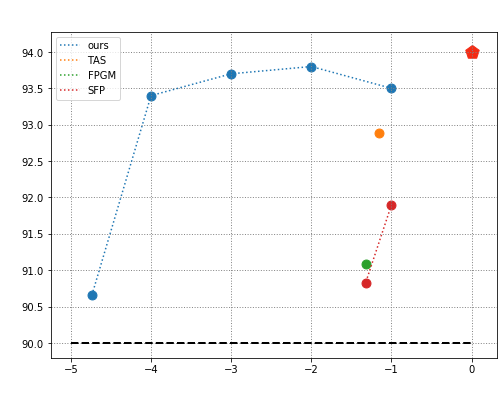

<Figure size 432x288 with 0 Axes>

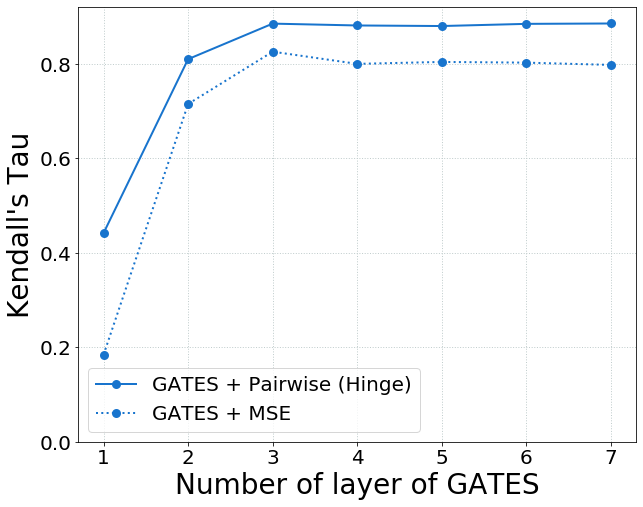

In [251]:
mse_gcn = [0.5058,0.4297,0.3437,0.0009,0.003,0.0023]
mse_gates = [0.5330,0.5390,0.5425,0.2340,0.0295,-0.004]
pair_gcn = [0.5775,0.6064,0.5528,0.5061,0.4628,0.4643,0.4794,0.4678]
pair_gates = [0.6510,0.7549,0.7792,0.7812,0.7789,0.7713,0.7598,0.7587]

mse_gates_2 = [0.1843,0.7152,0.8259,0.8001,0.8042,0.8027,0.7979]
pair_gates_2 = [0.4419,0.8101,0.8853,0.8814,0.8802,0.8848,0.8856]

margins_gates = [0.74076,.7686,.76778,.77894,.76852,.74474]
margins_gcn = [0.46042,0.51978,0.51538,0.47942,0.48124,0.46956]
margins_lstm = [.40932,.4477,.5993,.60022,.62912,.65058]
margins_mlp = [.5082,.49786,.49194,.4953,.499,.50408]

margins_i = np.log10([0.0001,0.001,0.01,0.1,1,5])

plt.tight_layout()

fig, ax = plt.subplots(figsize=[10,8])
ax.grid(b=True, linestyle=':', linewidth='1', color='#c1cdcd')
plt.xlabel("Number of layer of GATES",fontsize=28)
# plt.xlabel("Number of layer of GATES",fontsize=24)
# plt.xlabel("Margin",fontsize=24)
plt.ylabel("Kendall's Tau",fontsize=28)

# ax.plot(mse_gcn,label="GCN + Regression",mew=3,marker="o",linestyle=":",linewidth='2',color="#ff7315")
# ax.plot(mse_gates,label="GATES + Regression ",mew=3,marker="o",linestyle=":",linewidth='2',color="#1874cd")
# ax.plot(pair_gcn,label="GCN + Pairwise (Hinge)",mew=3,marker="o",linestyle="-",linewidth='2',color="#ff7315")
# ax.plot(pair_gates,label="GATES + Pairwise (Hinge)",mew=3,marker="o",linestyle="-",linewidth='2',color="#1874cd")

ax.plot(pair_gates_2,label="GATES + Pairwise (Hinge)",mew=3,marker="o",linestyle="-",linewidth='2',color="#1874cd")
ax.plot(mse_gates_2,label="GATES + MSE",mew=3,marker="o",linestyle=":",linewidth='2',color="#1874cd")

# ax.plot(margins_i,margins_gates,mew=5,label="GATES",marker="o",linestyle="-",linewidth='3',color="#1874cd")
# ax.plot(margins_i,margins_gcn,mew=5,label="GCN",marker="o",linestyle="-",linewidth='3',color="#ff7315")
# ax.plot(margins_i,margins_lstm,mew=5,label="LSTM",marker="o",linestyle="-",linewidth='3',color="#29A19c")
# ax.plot(margins_i,margins_mlp,mew=5,label="MLP",marker="o",linestyle="-",linewidth='3',color="#da2d2d")


plt.legend(fontsize=20,loc=3)
plt.xticks(np.arange(0,7),np.arange(0,8)+1,fontsize=20)
# plt.yticks(np.arange(-0.4,0.8,0.2),[" "," ","0.0","0.2","0.4","0.6","0.8"],fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(-0.4)
plt.ylim(-0.0)

plt.savefig("./gates/layer_nasbench201.pdf")
# plt.savefig("./gates/layer_nasbench101.pdf")

AttributeError: 'numpy.ndarray' object has no attribute 'grid'

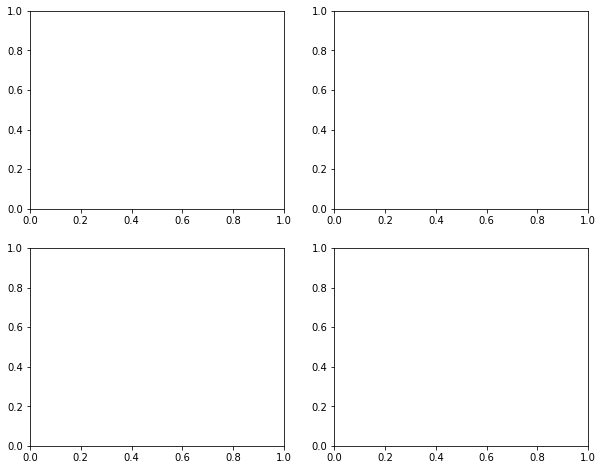

In [321]:
from matplotlib import gridspec


fig, ax = plt.subplots(2,2,figsize=[10,8])
ax[0].grid()
ax[0].set_xlabel("a")
ax[0].plot(np.random.randn(10),mew=4,marker="o",linestyle=":")
plt.xlabel("a")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcd35ba0e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcd35bb05c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcd35ba0d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd35bb0c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd35bb0f98>],
 'means': []}

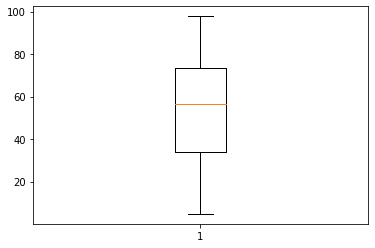

In [5]:
np.random.seed(19680801)
data = np.random.rand(50)*100
fig, ax = plt.subplots()
    ax.boxplot(data, notch=False)

In [247]:

def test_xp(true_scores, predict_scores):
    true_inds = np.argsort(true_scores)[::-1]
    true_scores = np.array(true_scores)
    reorder_true_scores = true_scores[true_inds]
    predict_scores = np.array(predict_scores)
    reorder_predict_scores = predict_scores[true_inds]
    ranks = np.argsort(reorder_predict_scores)[::-1]
    num_archs = len(ranks)
    # calculate precision at each point
    cur_inds = np.zeros(num_archs)
    passed_set = set()
    for i_rank, rank in enumerate(ranks):
        cur_inds[i_rank] = (cur_inds[i_rank - 1] if i_rank > 0 else 0) + \
                           int(i_rank in passed_set) + int(rank <= i_rank)
        passed_set.add(rank)
    patks = cur_inds / (np.arange(num_archs) + 1)
    THRESH = 100
    p_corrs = []
    for prec in [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]:
        k = np.where(patks[THRESH:] >= prec)[0][0] + THRESH
        arch_inds = ranks[:k][ranks[:k] < k]
        # stats.kendalltau(arch_inds, np.arange(len(arch_inds)))
        p_corrs.append((k, float(k)/num_archs, len(arch_inds), prec, stats.kendalltau(
            reorder_true_scores[arch_inds],
            reorder_predict_scores[arch_inds]).correlation))
    return p_corrs

def test_xk(true_scores, predict_scores):
    true_inds = np.argsort(true_scores)[::-1]
    true_scores = np.array(true_scores)
    reorder_true_scores = true_scores[true_inds]
    predict_scores = np.array(predict_scores)
    reorder_predict_scores = predict_scores[true_inds]
    ranks = np.argsort(reorder_predict_scores)[::-1]
    num_archs = len(ranks)
    patks = []
#     for ratio in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]:
    plot_inds = np.concatenate([np.arange(0.001,0.1,0.01),np.arange(0.1,1,0.01)])
    for ratio in plot_inds:
        k = int(num_archs * ratio)
        p = len(np.where(ranks[:k] < k)[0]) / float(k)
        arch_inds = ranks[:k][ranks[:k] < k]
        patks.append((k, ratio, len(arch_inds), p, stats.kendalltau(
            reorder_true_scores[arch_inds],
            reorder_predict_scores[arch_inds]).correlation))
    return patks

def test_nk(true_scores, predict_scores,K=10):
    predict_scores = np.array(predict_scores)
    true_scores = np.array(true_scores)
    pred_inds = np.argsort(predict_scores)[::-1] # Sorted Predicted Scores
    reorder_predict_scores = predict_scores[pred_inds]
    reorder_true_scores = true_scores[pred_inds]
    ranks = np.argsort(reorder_true_scores)[::-1]
    return ranks[:K]






[11927 11980 11193 11177 11150 11770 11366 11920 11983 11081]
[11927 10851 10830 11130 10667 11741 10930 11986 10403 11053]
[11344 11898 11330  6543 11720 11908  8066  9754 11638  9357]


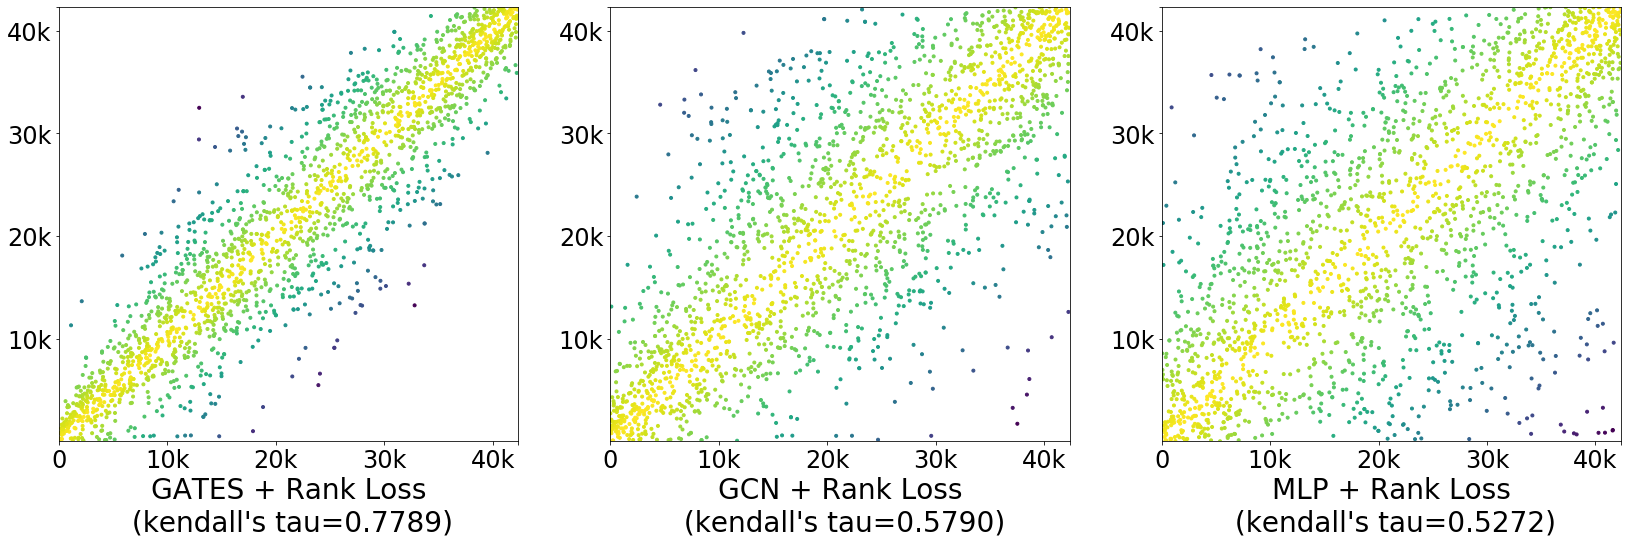

In [3]:
import pickle
from scipy.stats import stats

data = {}
for name in ["gates","gcn","lstm","mlp"]:
    with open("./predict_results/{}.pkl".format(name), 'rb') as f:
        data[name] = pickle.load(f)

# data = {}
# for name in ["gates","lstm","mlp"]:
#     with open("./predict_results_regression/{}.pkl".format(name), 'rb') as f:
#         data[name] = pickle.load(f)

# data = {}
# for name in ["gates","lstm","mlp"]:
#     with open("./gates/nb201_predict_results_rank/{}.pkl".format(name), 'rb') as f:
#         data[name] = pickle.load(f)
  
def reorder(true_scores, predict_scores):
    true_inds = np.argsort(true_scores)
    true_scores = np.array(true_scores)
    reorder_true_scores = true_scores[true_inds]
    predict_scores = np.array(predict_scores)
    reorder_predict_scores = predict_scores[true_inds]
    ranks = np.argsort(reorder_predict_scores)
    return ranks

names = ["gates","gcn","mlp"]
fig, ax = plt.subplots(1,3,figsize=[28,8])

# ranks = reorder(data[name][0], data[name][1])
for idx, name in enumerate(names):
    ranks = reorder(data[name][0], data[name][1])
    err = np.array([12000-abs(ranks[i] - i) for i in range(len(data[name][0]))])
    print(err[:10])
    rand_inds = np.random.randint(0,len(ranks),size=2000)
    ax[idx].scatter(rand_inds,ranks[rand_inds],c=err[rand_inds],marker='.',cmap="viridis",label=name)
    ax[idx].plot(len(ranks),len(ranks))
    # ax[idx].grid()
#     ax[idx].yaxis.get_major_formatter().set_powerlimits((0,1))
#     ax[idx].xaxis.get_major_formatter().set_powerlimits((0,1))

    ax[idx].set_xticks([2000,4000,6000,8000])
    ax[idx].set_xticklabels(["2k","4k","6k","8k"])
    ax[idx].set_yticks([2000,4000,6000,8000])
    ax[idx].set_yticklabels(["2k","4k","6k","8k"])
    
    ax[idx].set_xticks([0,10000,20000,30000,40000,len(ranks)])
    ax[idx].set_xticklabels(["0","10k","20k","30k","40k"])
    ax[idx].set_yticks([10000,20000,30000,40000,len(ranks)])
    ax[idx].set_yticklabels(["10k","20k","30k","40k"])
    # ax[idx].set_xticks([10000,20000,30000,40000],["10k","20k","30k","40k"])
    ax[idx].tick_params(axis='both', which='major', labelsize=24)
    ax[idx].set_xlim(0,len(ranks))
    ax[idx].set_ylim(0,len(ranks))
    # ax[idx].set_xlabel(name,fontsize=36)
#plt.xlim(0.0,1)
#plt.ylim(0.0,1)
ax[0].set_xlabel("GATES + Rank Loss\n (kendall's tau=0.7789)",fontsize=28)
ax[1].set_xlabel("GCN + Rank Loss\n (kendall's tau=0.5790)",fontsize=28)
# ax[1].set_xlabel("LSTM + Rank Loss\n (kendall tau=0.5790)",fontsize=28)
ax[2].set_xlabel("MLP + Rank Loss\n (kendall's tau=0.5272)",fontsize=28)

plt.savefig("./gates/nb101_sactter.pdf")



In [513]:
data = {}
for name in ["gates","lstm","mlp"]:
    with open("./gates/nb201_predict_results_regresion/{}.pkl".format(name), 'rb') as f:
        data[name] = pickle.load(f)

for k in [1,5,10,50]:
    print("========={}=========".format(k))
    for name in data.keys():
        n_at_k_s = test_nk(data[name][0], data[name][1], K=k)
        # print("{} | {} | {}".format(name, min(n_at_k_s), str(n_at_k_s)))
        print("{} | {} ({:e})".format(name,min(n_at_k_s)+1,(min(n_at_k_s)+1)/len(data[name][0])))
    

=========1=========
gates | 9 (1.152074e-03)
lstm | 513 (6.566820e-02)
mlp | 1605 (2.054531e-01)
=========5=========
gates | 1 (1.280082e-04)
lstm | 251 (3.213006e-02)
mlp | 1539 (1.970046e-01)
=========10=========
gates | 1 (1.280082e-04)
lstm | 225 (2.880184e-02)
mlp | 235 (3.008193e-02)
=========50=========
gates | 1 (1.280082e-04)
lstm | 48 (6.144393e-03)
mlp | 114 (1.459293e-02)


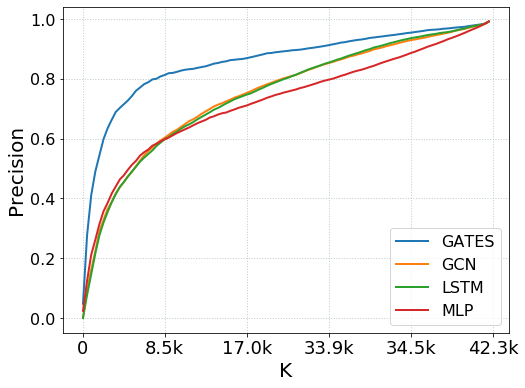

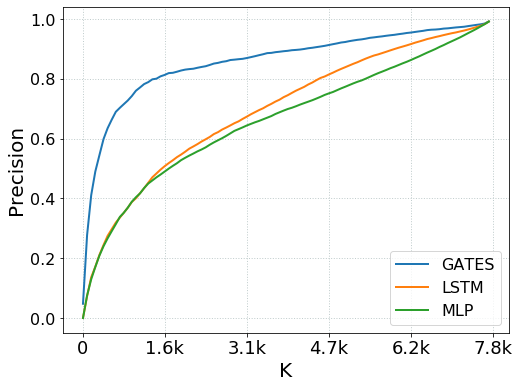

In [249]:
import pickle
from scipy.stats import stats

data = {}
for name in ["GATES","GCN","LSTM","MLP"]:
    with open("./predict_results/{}.pkl".format(name), 'rb') as f:
        data[name] = pickle.load(f)

fig,ax = plt.subplots(figsize=[8.,6.])
ax.grid(b=True, linestyle=':', linewidth='1', color='#c1cdcd')
p_at_ks = {}

for name in ["GATES","GCN","LSTM","MLP"]:
# for name in ["gates","lstm","mlp"]:
    p_at_ks[name] = [i[3] for i in test_xk(data[name][0],data[name][1])]
    inds = [i[1] for i in test_xk(data[name][0],data[name][1])]
    # ax.plot(inds,p_at_ks[name],label=name,mew=3,marker="o",linestyle="-",linewidth='2')
    ax.plot(inds,p_at_ks[name],label=name,linestyle="-",linewidth='2')

plt.legend(fontsize=16,loc=0)
# plt.xticks(range(7),inds, fontsize=16)
plt.xticks(np.arange(0,1.2,0.2),["0","8.5k","17.0k","33.9k","34.5k","42.3k"],fontsize=18)
plt.yticks(fontsize=16)
plt.ylabel("Precision",fontsize=20)
plt.xlabel("K",fontsize=20)

plt.savefig("nb101_patk.pdf")

# -------------------------------------------------------------------------

data = {}
for name in ["GATES","LSTM","MLP"]:
    with open("./predict_results_regression/{}.pkl".format(name), 'rb') as f:
        data[name] = pickle.load(f)

fig,ax = plt.subplots(figsize=[8.,6.])
ax.grid(b=True, linestyle=':', linewidth='1', color='#c1cdcd')
p_at_ks = {}

for name in ["GATES","LSTM","MLP"]:
# for name in ["gates","lstm","mlp"]:
    p_at_ks[name] = [i[3] for i in test_xk(data[name][0],data[name][1])]
    inds = [i[1] for i in test_xk(data[name][0],data[name][1])]
    # ax.plot(inds,p_at_ks[name],label=name,mew=3,marker="o",linestyle="-",linewidth='2')
    ax.plot(inds,p_at_ks[name],label=name,linestyle="-",linewidth='2')

plt.legend(fontsize=16,loc=0)
# plt.xticks(range(7),inds, fontsize=16)
plt.xticks(np.arange(0,1.2,0.2),["0","1.6k","3.1k","4.7k","6.2k","7.8k"],fontsize=18)
plt.yticks(fontsize=16)
plt.ylabel("Precision",fontsize=20)
plt.xlabel("K",fontsize=20)


plt.savefig("nb201_patk.pdf")


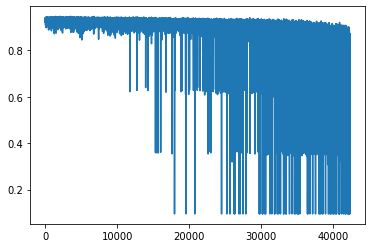

In [221]:
true_scores = data[name][0]
predict_scores = data[name][1]

predict_scores = np.array(predict_scores)
true_scores = np.array(true_scores)
pred_inds = np.argsort(predict_scores)[::-1] # Sorted Predicted Scores
reorder_predict_scores = predict_scores[pred_inds]
reorder_true_scores = true_scores[pred_inds]
ranks = np.argsort(reorder_true_scores)[::-1]
K = 10

# print(ranks[:K],true_scores[ranks[:K]],reorder_predict_scores[:K])
# plt.plot(reorder_predict_scores)
# print(name)


# random_chosen = np.random.choice(reorder_predict_scores,size=1000)
# actual_inds = np.array([])
# for i in range(len(random_chosen)):
#     actual_inds = np.concatenate([actual_inds,np.argwhere(predict_scores == random_chosen[i])[0]])
# reorder_actual_inds = np.argsort(true_scores[actual_inds.astype(int)])
# print(actual_inds[reorder_actual_inds])
# plt.plot(true_scores[actual_inds[reorder_actual_inds].astype(int)])


# true_inds = np.argsort(true_scores)[::-1]
# reorder_true_scores = true_scores[true_inds]
# predict_scores = np.array(predict_scores)
# reorder_predict_scores = predict_scores[true_inds]
# ranks = np.argsort(reorder_predict_scores)[::-1]

# plt.plot(reorder_predict_scores)
# plt.plot(reorder_true_scores)
# plt.hlines(reorder_predict_scores[ranks[0]],.0,40000,lw = 2,linestyle="--")\
# print(ranks[0], reorder_predict_scores[0], reorder_predict_scores[ranks[0]], reorder_true_scores[0], reorder_true_scores[ranks[0]])

# num_archs = len(ranks)
# patks = []
# #     for ratio in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]:
# plot_inds = np.concatenate([np.arange(0.001,0.1,0.01),np.arange(0.1,1,0.01)])
# for ratio in plot_inds:
#     k = int(num_archs * ratio)
#     p = len(np.where(ranks[:k] < k)[0]) / float(k)
#     arch_inds = ranks[:k][ranks[:k] < k]
#     patks.append((k, ratio, len(arch_inds), p, stats.kendalltau(
#         reorder_true_scores[arch_inds],
#         reorder_predict_scores[arch_inds]).correlation))


K:10  Ratio:500  M:2  Loop:1
[  2.  82. 118.  89.]
[0.9465812  0.94304222 0.94250802 0.94294204] 0.9471821784973145 0.9599548


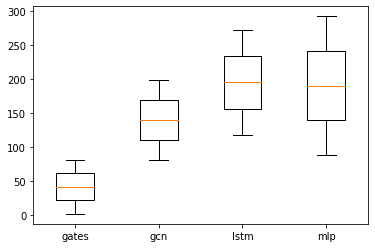

In [344]:

import matplotlib.pyplot as plt
import numpy as np
import pickle
data = {}

for name in ["gates"]:
    with open("./predict_results/{}.pkl".format(name), 'rb') as f:
        data[name] = pickle.load(f)

# for name in ["gates1"]:
#     with open("./gates_listwise.pkl", 'rb') as f:
#         data[name] = pickle.load(f)
        
for name in ["gcn","lstm","mlp"]:
    with open("./predict_results_regression/{}.pkl".format(name), 'rb') as f:
        data[name] = pickle.load(f)
        
# for name in ["gcn","lstm","mlp"]:
#     with open("./predict_results/{}.pkl".format(name), 'rb') as f:
#         data[name] = pickle.load(f)


num_loop = 1
K = 10
N = 500
num_repeat = 20 // K
print("K:{}  Ratio:{}  M:{}  Loop:{}".format(K,N,num_repeat,num_loop))
for_plot = np.zeros([num_repeat*num_loop,len(data.keys())])
min_ranks = np.array([])
min_ranks_global = np.array([])
for l in range(num_loop):
    base_seed = np.random.randint(1000)
    # print("base rand seed",base_seed)
    for i in range(num_repeat):
        for idx,name in enumerate(data.keys()):

            true_scores = np.array(data[name][0])
            predict_scores = np.array(data[name][1])

            true_inds = np.argsort(true_scores)[::-1]
            reorder_true_scores = true_scores[true_inds.astype(int)]

            # Acquire Same Random Scores
            np.random.seed(i+base_seed)
            random_ind = np.random.randint(0,len(predict_scores),size=K*N)
            random_scores = true_scores[random_ind]
            # plt.plot(random_scores)

            sort_random_inds = np.argsort(random_scores)[::-1]
            reorder_random_scores = random_scores[sort_random_inds.astype(int)]

            sampled_best_ind = np.argsort(predict_scores[random_ind])[-K:]
            sampled_ranks = []
            sampled_ranks_global = []
            for j in sampled_best_ind:
                sampled_ranks = np.concatenate([sampled_ranks,\
                            np.argwhere(reorder_random_scores == random_scores[j])[0]])
                sampled_ranks_global = np.concatenate([sampled_ranks_global,\
                            np.argwhere(reorder_true_scores == random_scores[j])[0]])
            min_ranks = np.min(sampled_ranks)
            min_ranks_global = np.min(sampled_ranks_global)
            for_plot[l*num_repeat+i,idx] = np.min(min_ranks_global)

ax,fig = plt.subplots()
print(np.min(for_plot,axis=0))
a = fig.boxplot(for_plot,labels=data.keys(),showfliers=False)

reorder_true_scores = np.array(reorder_true_scores)

print(reorder_true_scores[np.min(for_plot,axis=0).astype(int)],np.max(true_scores),np.max(predict_scores))


(20, 4)

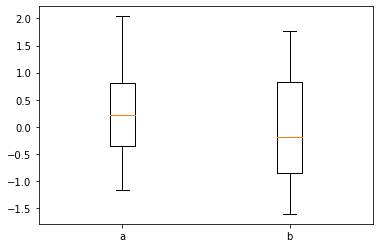

In [285]:
a = np.array([1.,2.,3.])
b = np.random.choice(a,size=2)
# [np.argwhere(a == b_) for b_ in b]
c = np.random.randint(0,10,size=2)




d = np.random.randn(20,2)
plt.boxplot(d,labels=["a","b"])
np.concatenate([d,d],axis=1).shape




(10,) [ 50 100 150 200 250 300 350 400 450 500]
(10,) [ 50 100 150 200 250 300 350 400 450 500]
(10,) [ 50 100 150 200 250 300 350 400 450 500]
(10,) [ 50 100 150 200 250 300 350 400 450 500]
0 [0.94418 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055
 0.95055]
1 [0.94304 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055
 0.95055]
2 [0.94418 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055
 0.95055]
3 [0.94418 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055
 0.95055]
4 [0.94451 0.94515 0.94658 0.94658 0.94658 0.94658 0.94658 0.94658 0.94658
 0.94658]
5 [0.94244 0.94244 0.94491 0.94491 0.94491 0.94491 0.94491 0.94618 0.94618
 0.94618]
6 [0.94558 0.94558 0.94558 0.94558 0.94558 0.94558 0.94558 0.94585 0.94585
 0.94585]
7 [0.94204 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055
 0.95055]
8 [0.94174 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055 0.95055
 0.95055]
9 [0.94418 0.95055 0.95055 0.95055 0.95055 

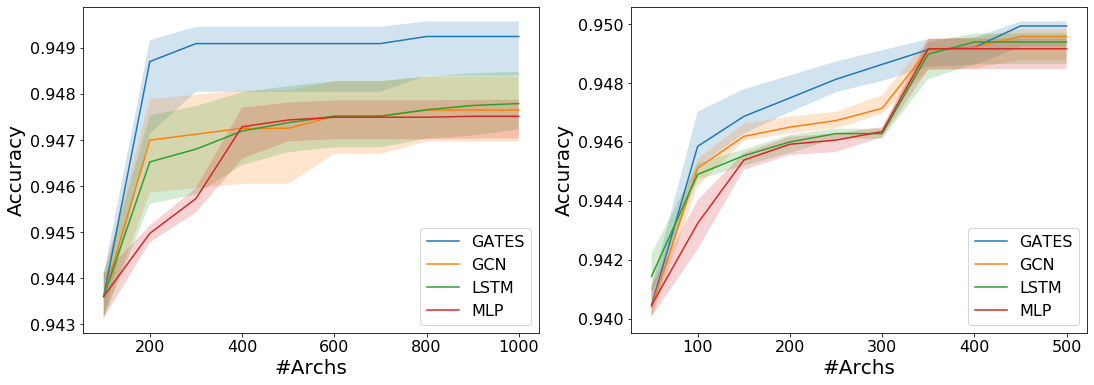

In [5]:
import pickle

with open("./gates/evo_encoders/boxplot.pkl","rb") as f:
    d = pickle.load(f)
    
# print(d["lstm"])
    
# d.pop("lstm")
# d.pop("mlp")

fig, ax = plt.subplots(1,2,figsize=[18.,6.])
    
# for name, vals in d.items():
for name in ["gates","gcn","lstm","mlp"]:
    vals = d[name]
    val_accs = np.zeros([len(vals),vals[0].shape[1]])
    for idx, val in enumerate(vals):
#         if (val[1].shape[0] < 10):
#             val_accs[idx,:] = val_accs[idx-1,:]
#         else:
#             val_accs[idx,:] = val[1]
          val_accs[idx,:] = val[1]
    val_accs_median = np.median(val_accs, axis=0)
    val_accs_mean = val_accs.mean(axis=0)
    val_accs_max = val_accs.max(axis=0)
    val_accs_min = val_accs.min(axis=0)
    # print(val_accs_max)
    diff0 = (val_accs_max - val_accs_mean)
    diff1 = (val_accs_min - val_accs_mean)
    xs0 = np.arange(0,10)*50+50
    print(val_accs_mean.shape,xs0)
    ax[1].fill_between(xs0,val_accs_mean+0.25*diff0, val_accs_mean+0.25*diff1, alpha=0.2, linewidth=0)
    # ax.fill_between(range(len(val_accs_mean)),val_accs_max, val_accs_min, alpha=0.1, linewidth=0)

    ax[1].plot(xs0,val_accs_mean,label=name.upper())
    # ax[0].plot(xs0,val_accs_median,label=name.upper())
    ax[1].legend(fontsize=16,loc="lower right")
    ax[1].tick_params(axis='both', which='major', labelsize=16)
    ax[1].set_xlabel("#Archs",fontsize=20)
    ax[1].set_ylabel("Accuracy",fontsize=20)
    
        

# with open("./gates/rs_encoders/rs_encoders/boxplot.pkl","rb") as f:
with open("./gates/rs_encoders/rs_encoders_11_b/boxplot.pkl","rb") as f:
    d = pickle.load(f)
    
for name in ["gates","gcn","lstm","mlp"]:
    vals = d[name]
    EXPECTED_LENGTH  = 10
    val_accs = np.zeros([len(vals),EXPECTED_LENGTH])
    for idx, val in enumerate(vals):
        
        val_accs[idx,:] = val[1]
        
#         if (val[1].shape[0] < EXPECTED_LENGTH):
#             tmp_val = np.array(list(val[1]) + [val[1][-1]])
#             print(tmp_val.shape)
#             val_accs[idx,:] = tmp_val
#         elif (val[1].shape[0] > EXPECTED_LENGTH):
#             tmp_val = val[1][:EXPECTED_LENGTH]
#             val_accs[idx,:] = tmp_val
#         else:
#             val_accs[idx,:] = val[1]
        
    
    if name == "gates":
#         val_accs[8] = val_accs[9]
#         val_accs[6] = val_accs[9]
        # val_accs[2] = val_accs[4]
        for i in range(val_accs.shape[0]):
            print(i, val_accs[i])
        # val_accs[14] = val_accs[13]

    val_accs_mean = val_accs.mean(axis=0)
    
#     if name == "gates":
#         save = val_accs_mean[0]
#     else:
#         val_accs_mean[0] = save
        # pass
    val_accs_max = val_accs.max(axis=0)
    val_accs_min = val_accs.min(axis=0)
    # print(val_accs_max)
    xs0 = np.arange(0,10)*100+100
    diff0 = (val_accs_max - val_accs_mean)
    diff1 = (val_accs_min - val_accs_mean)
    ax[0].fill_between(xs0,val_accs_mean+0.25*diff0, val_accs_mean+0.25*diff1, alpha=0.2, linewidth=0)
    # ax.fill_between(range(len(val_accs_mean)),val_accs_max, val_accs_min, alpha=0.1, linewidth=0)

    ax[0].plot(xs0,val_accs_mean,label=name.upper())
    ax[0].legend(fontsize=16)
    ax[0].tick_params(axis='both', which='major', labelsize=16)
    ax[0].set_xlabel("#Archs",fontsize=20)
    ax[0].set_ylabel("Accuracy",fontsize=20)
    plt.savefig("./gates/encoders.pdf")
    
    extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('./gates/encoders_a.pdf', bbox_inches=extent.expanded(1.5, 1.5))
    
    
    
    
# plt.savefig("./gates/accs_line.pdf")

(10,) [ 50 100 150 200 250 300 350 400 450 500]
(10,) [ 50 100 150 200 250 300 350 400 450 500]
(10,) [ 50 100 150 200 250 300 350 400 450 500]
(10,) [ 50 100 150 200 250 300 350 400 450 500]


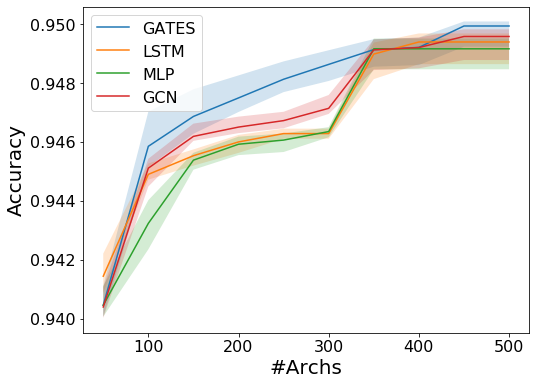

In [179]:
import pickle

with open("./gates/evo_encoders/boxplot.pkl","rb") as f:
    d = pickle.load(f)
    
# print(d["lstm"])
    
# d.pop("lstm")
# d.pop("mlp")

fig, ax = plt.subplots(figsize=[8.,6.])
    
for name, vals in d.items():
    val_accs = np.zeros([len(vals),vals[0].shape[1]])
    for idx, val in enumerate(vals):
        if (val[1].shape[0] < 10):
            val_accs[idx,:] = val_accs[idx-1,:]
        else:
            val_accs[idx,:] = val[1]
    val_accs_median = np.median(val_accs, axis=0)
    val_accs_mean = val_accs.mean(axis=0)
    val_accs_max = val_accs.max(axis=0)
    val_accs_min = val_accs.min(axis=0)
    # print(val_accs_max)
    diff0 = (val_accs_max - val_accs_mean)
    diff1 = (val_accs_min - val_accs_mean)
    xs0 = np.arange(0,10)*50 + 50
    print(val_accs_mean.shape,xs0)
    ax.fill_between(xs0,val_accs_mean+0.25*diff0, val_accs_mean+0.25*diff1, alpha=0.2, linewidth=0)
    # ax.fill_between(range(len(val_accs_mean)),val_accs_max, val_accs_min, alpha=0.1, linewidth=0)

    ax.plot(xs0,val_accs_mean,label=name.upper())
    # ax[0].plot(xs0,val_accs_median,label=name.upper())
    ax.legend(fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel("#Archs",fontsize=20)
    ax.set_ylabel("Accuracy",fontsize=20)
plt.savefig("./gates/evo_encoders/evo_plot.pdf")



    

{'50': [20, 20, 20, 20, 5, 20, 4, 7, 20, 20], '100': [7, 5, 7, 7, 8, 4, 6, 20, 4, 20], '200': [4, 5, 6, 2, 3, 4, 7, 3, 2, 5], '1000': [4, 4, 4, 4, 5, 4, 5, 4, 4, 5], '5000': [20, 20, 20, 4, 20, 20, 20, 20, 20, 3], '10000': [20, 20, 20, 20, 20, 20, 20, 20, 20, 4]}


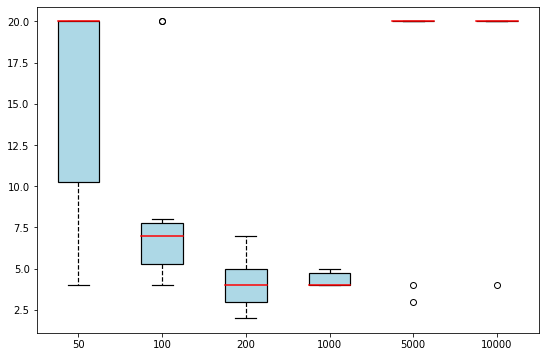

[ 200  250  300  350  400  450  500  550  600  650  700  750  800  850
  900  950 1000 1050 1100 1150]


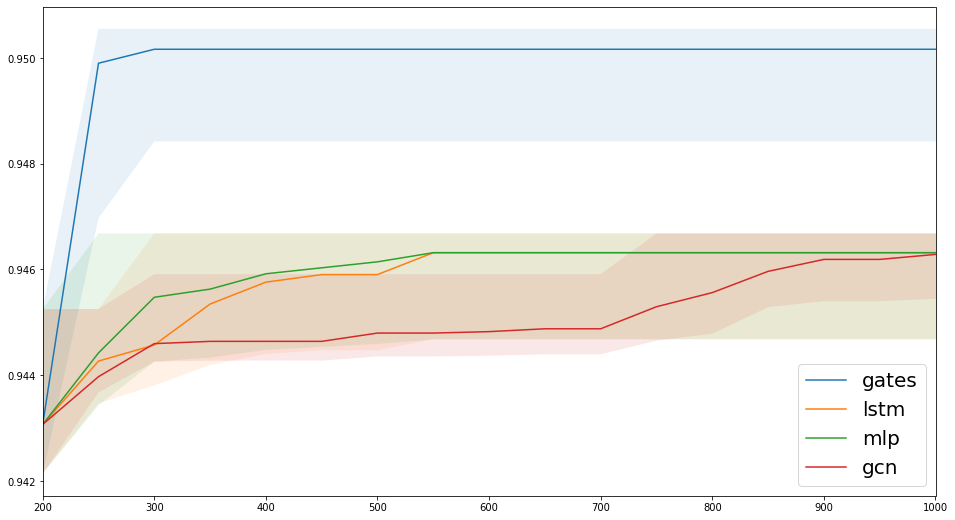

In [116]:
import pickle

with open("./gates/boxplot.pkl","rb") as f:
    d = pickle.load(f)

with open("./gates/boxplot1.pkl","rb") as f:
    d1 = pickle.load(f)

with open("./gates/boxplot2.pkl","rb") as f:
    d2 = pickle.load(f)
    
d1["gates"] = d["gates"]
# d1["gates_evo"] = d2["gates_evo"]


# for name in d1.keys():
#     print(name, d1[name][0].shape)
    

fig, ax = plt.subplots(figsize=[16.,9.])

xs0 = np.arange(0,20*50,50)+200
print(xs0)
    
for name, vals in d1.items():
    if name=="gates_evo":
        val_accs = np.zeros([len(vals),vals[0].shape[1]])
        idxs = []
        for idx, val in enumerate(vals):
            if (len(val[1]) == 18):
                val_accs[idx,:] = np.append(val[1],[0.95055,0.95055])
                idxs.append(idx)
            if (len(val[1]) == 20):
                val_accs[idx,:] = val[1]
                idxs.append(idx)
            else:
                pass      
        val_accs = val_accs[idxs]
        val_accs_mean = val_accs.mean(axis=0)
        val_accs_max = val_accs.max(axis=0)
        val_accs_min = val_accs.min(axis=0)
        diff0 = (val_accs_max - val_accs_mean)
        diff1 = (val_accs_min - val_accs_mean)
        ax.fill_between(xs0,val_accs_mean+0.2*diff0, val_accs_mean+0.2*diff1, alpha=0.1, linewidth=0)
        # ax.fill_between(range(len(val_accs_mean)),val_accs_max, val_accs_min, alpha=0.1, linewidth=0)
        print(val_accs_mean)
        ax.plot(xs0,val_accs_mean,label=name)
        ax.legend(fontsize=20)
    else:
        val_accs = np.zeros([len(vals),vals[0].shape[1]])
        for idx, val in enumerate(vals):
            val_accs[idx,:] = val[1]
        val_accs_mean = val_accs.mean(axis=0)
        val_accs_max = val_accs.max(axis=0)
        val_accs_min = val_accs.min(axis=0)
        # print(val_accs_max)
        diff0 = (val_accs_max - val_accs_mean)
        diff1 = (val_accs_min - val_accs_mean)
        ax.fill_between(xs0,val_accs_mean+1*diff0, val_accs_mean+0.5*diff1, alpha=0.1, linewidth=0)
        # ax.fill_between(range(len(val_accs_mean)),val_accs_max, val_accs_min, alpha=0.1, linewidth=0)
        ax.plot(xs0,val_accs_mean,label=name)
        ax.legend(fontsize=20)
    ax.set_xlim(200,1000)
        

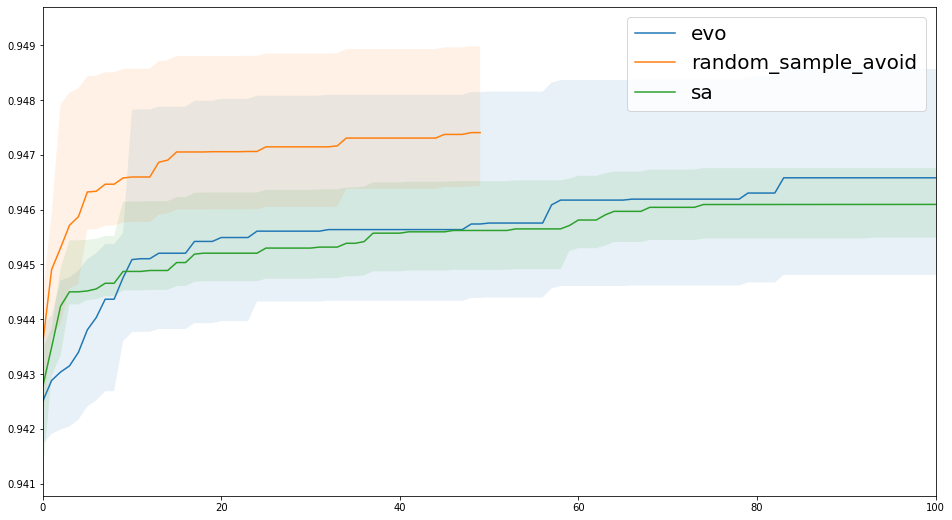

In [115]:
import pickle

with open("./gates/boxplot_baseline.pkl","rb") as f:
    d = pickle.load(f)
    

# for i in d["random_sample_avoid"]:
#     print(i[1][:20])

fig, ax = plt.subplots(figsize=[16.,9.])
    
for name, vals in d.items():
    val_accs = np.zeros([len(vals),vals[0].shape[1]])
    for idx, val in enumerate(vals):
        val_accs[idx,:] = val[1]
    val_accs_mean = val_accs.mean(axis=0)
    val_accs_max = val_accs.max(axis=0)
    val_accs_min = val_accs.min(axis=0)
    # print(val_accs_max)
    diff0 = (val_accs_max - val_accs_mean)
    diff1 = (val_accs_min - val_accs_mean)
    ax.fill_between(range(len(val_accs_mean)),val_accs_mean+0.5*diff0, val_accs_mean+0.5*diff1, alpha=0.1, linewidth=0)
    # ax.fill_between(range(len(val_accs_mean)),val_accs_max, val_accs_min, alpha=0.1, linewidth=0)

    ax.plot(val_accs_mean,label=name)
    ax.legend(fontsize=20)
    ax.set_xlim(0,100)
        


-----0-----
[0.51886473 0.60246777 0.66203085 0.75440285]
[0.48800219 0.57023986 0.64610625 0.75251313]
[0.43591678 0.54673239 0.62446463 0.74892636]
-----1-----
[0.13327062 0.24202279 0.38637246 0.57285225]
[0.096684   0.17780998 0.36938808 0.56006077]
[0.07378894 0.13335759 0.34310782 0.54167634]
-----2-----
[0.68143956 0.78255097 0.86033159 0.89534647]
[0.67601999 0.76567523 0.85661668 0.89247347]
[0.66707713 0.7523707  0.85275916 0.88862974]
-----3-----
[0.44408496 0.43423808 0.61993835 0.6564534 ]
[0.39717657 0.42294347 0.59849714 0.64391647]
[0.36295457 0.41261637 0.56710619 0.63519872]


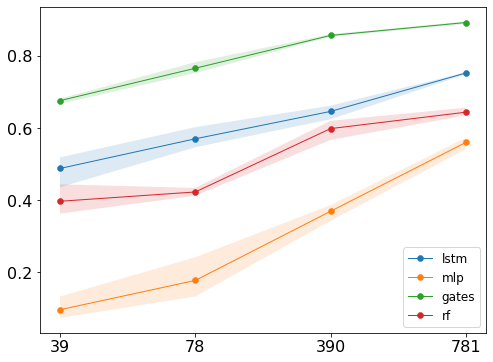

In [83]:
with open("./result.txt","r") as f:
    lines = f.readlines()

d = {} 
dats = []

for name in ["N", "acc", "pred"]:
    d[name]=[]
        
for line in lines:
    line = line.strip("\n")
    data_list = line.split(" ")
    dats.append(data_list)
    for idx, name in enumerate(["N", "acc", "pred"]):
        d[name].append(data_list[idx])

fig, ax = plt.subplots(figsize=[8.,6.])


preds = ["lstm","mlp","gates","rf"]
x = np.zeros([4,12])
for i in range(4):
    accs = [acc for idx,[N,acc,pred] in enumerate(dats) if int(pred)==i]
    accs = np.array(accs).astype("float")
    accs = accs.reshape(-1,3)
    print("-----{}-----".format(i))
    print(accs.max(axis=1))
    print(accs.mean(axis=1))
    print(accs.min(axis=1))
    ax.fill_between(range(accs.shape[0]),accs.min(axis=1), \
                    accs.max(axis=1), alpha=0.15, linewidth=0)
    ax.plot(accs.mean(axis=1),linewidth=1,label=preds[i],linestyle="-",mew=0.5,marker="o")
    ax.tick_params(axis='both', labelsize=16)
    ax.set_xticks(range(4))
    ax.set_xticklabels(["39","78","390","781"])
    
plt.legend(fontsize=12)
plt.savefig("./preds.pdf")
    # ax.plot(pair_gates_2,label="GATES + Pairwise (Hinge)",mew=3,marker="o",linestyle="-",linewidth='2',color="#1874cd")


    





        


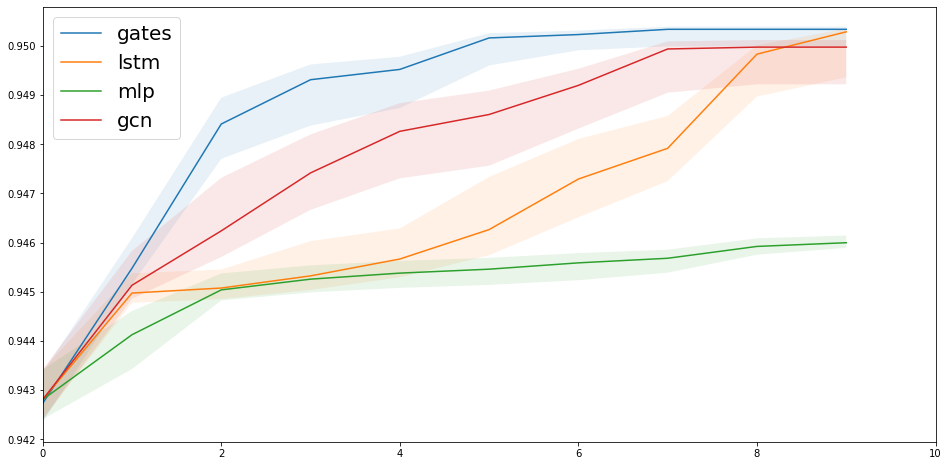

In [371]:

import pickle

with open("./gates/boxplot_evo.pkl","rb") as f:
    d = pickle.load(f)
  
fig, ax = plt.subplots(figsize=[16.,8.])
    
for name, vals in d.items():
    val_accs = np.zeros([len(vals),vals[0].shape[1]])
    for idx, val in enumerate(vals):
        val_accs[idx,:] = val[1]
    val_accs_mean = val_accs.mean(axis=0)
    val_accs_max = val_accs.max(axis=0)
    val_accs_min = val_accs.min(axis=0)
    # print(val_accs_max)
    diff0 = (val_accs_max - val_accs_mean)
    diff1 = (val_accs_min - val_accs_mean)
    ax.fill_between(range(len(val_accs_mean)),val_accs_mean+0.25*diff0, val_accs_mean+0.25*diff1, alpha=0.1, linewidth=0)
    # ax.fill_between(range(len(val_accs_mean)),val_accs_max, val_accs_min, alpha=0.1, linewidth=0)

    ax.plot(val_accs_mean,label=name)
    ax.legend(fontsize=20)
    ax.set_xlim(0,10)
        

[300 300 700 300 300 350 550 450 400 300 300 450 300 700 300]


(0, 1000)

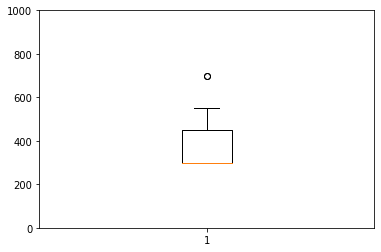

In [145]:
with open("./gates/boxplot_evo.pkl","rb") as f:
    d = pickle.load(f)
    
vals = d["gates"]

# for val in vals:
#     if np.argwhere(val[1] == 0.95055).any():
#         print(np.argwhere(val[1] == 0.95055)[0])
    # print(list(val[1]).index(0.95055))

gates_found = [int(np.argwhere(val[1] == 0.95055)[0]) \
 if np.argwhere(val[1] == 0.95055).any() else 10 \
 for val in vals]

gates_found = np.array(gates_found)*50 +200
print(gates_found)

plt.boxplot(gates_found)
plt.ylim(0,1000)
    
# val_accs = np.zeros([len(vals),vals[0].shape[1]])
# for idx, val in enumerate(vals):
#     val_accs[idx,:] = val[1]
    



[4, 1, 0, 3, 7, 0]


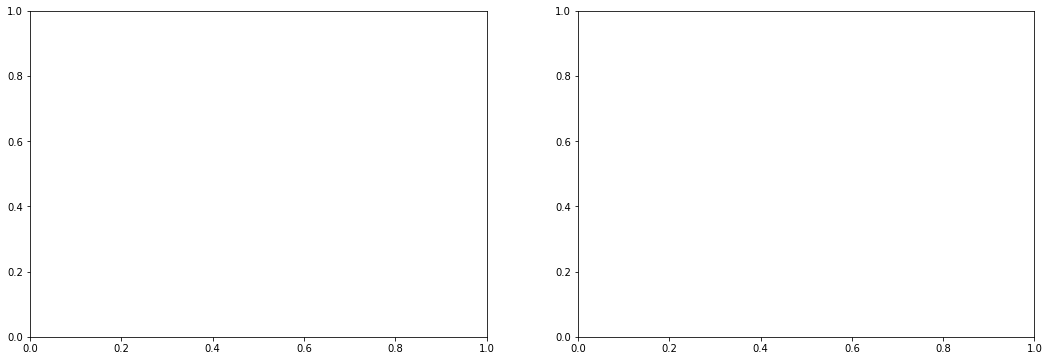

In [58]:

fig,ax = plt.subplots(1,2,figsize=[18.,6.])

PLOT_MEAN = False
# with open("./gates/boxplot_evo.pkl","rb") as f:
#     d = pickle.load(f)
    
# vals = d["gates"]

# for val in vals:
#     if np.argwhere(val[1] == 0.95055).any():
#         print(np.argwhere(val[1] == 0.95055)[0])
    # print(list(val[1]).index(0.95055))

# gates_found = [int(np.argwhere(val[1] == 0.95055)[0]) \
#  if np.argwhere(val[1] == 0.95055).any() else 10 \
#  for val in vals]

gates_found = [3,7,3,5,9,5,6,9,9,6,2,7,100,100,100]

gates_found = np.array(gates_found)*50+50
# gates_found = np.append(gates_found,0)



with open("./gates/data/boxplot_baseline2.pkl","rb") as f:
    d = pickle.load(f)

found_times = {}
for name, vals in d.items():
    found_times[name] = []
    for val in vals: 
        if np.argwhere(val[1] == 0.95055).any():
            found_times[name].append(int(np.argwhere(val[1] == 0.95055)[0]))
        else:
            pass
            # found_times[name].append(100)
            # print(name, int(np.argwhere(val[1] == 0.95055)[0]))

rs_found = found_times["random_sample_avoid"]
rs_found = rs_found+([80,60,60,61,62])

rs_found = (np.array(rs_found))*5000
rs_found = np.append(rs_found,0)


evo_found = found_times["evo"]
evo_found[0] = 4
evo_found[3] = 3
evo_found[4]  =7
print(evo_found)
evo_found = evo_found+([10,16,13,12,12])
evo_found = (np.array(evo_found)+1)*10000
evo_found = np.append(evo_found,0)


rs_found = [165000, 135000, 145000, 5000, 160000, 230000, 115000, 15000,105000, 170000
 ,400000 ,300000, 300000, 305000, 310000]
evo_found = [ 50000, 20000, 10000, 40000, 80000, 10000, 110000, 170000, 140000, 130000
 , 130000]
gates_found = [ 200, 400,  200,  300,  500,  300,  350,  500,  500,  350,  150,  400, 5050, 5050
 ,5050]

{'rs_found': [165000, 135000, 145000, 5000, 160000, 230000, 115000, 15000, 105000, 170000, 400000, 300000, 300000, 305000, 310000], 'evo_found': [50000, 20000, 10000, 40000, 80000, 10000, 110000, 170000, 140000, 130000, 130000], 'gates_found': [200, 400, 200, 300, 500, 300, 350, 500, 500, 350, 150, 400, 5050, 5050, 5050]}
100
[   400.    400.    500.    550.    600.    700.    750.    750.    800.
    800.    950.   1150.   1150.   1400.   1450.   1550.   1750.   1900.
   2050.   2050.   2100.   2200.   2200.   2250.   2600.   2950.   3100.
   3150.   3450.   3500.   3900.   4050.   4200.   4350.   4800.   5300.
   5400.   5550.   5650.   6050.   6050.   6200.   6850.   7000.  13100.
  23700.  23700.  23700.  23700.  19700.  23700.  29050.  41700.  52950.
  60500.  13100.  23700.  23700.  23700.  23700.  19700.  23700.  29050.
  41700.  52950.  60500.  13100.  23700.  23700.  23700.  23700.  19700.
  23700.  29050.  41700.  52950.  60500.  62500.  72800.  73550. 100000.
 100000. 100000

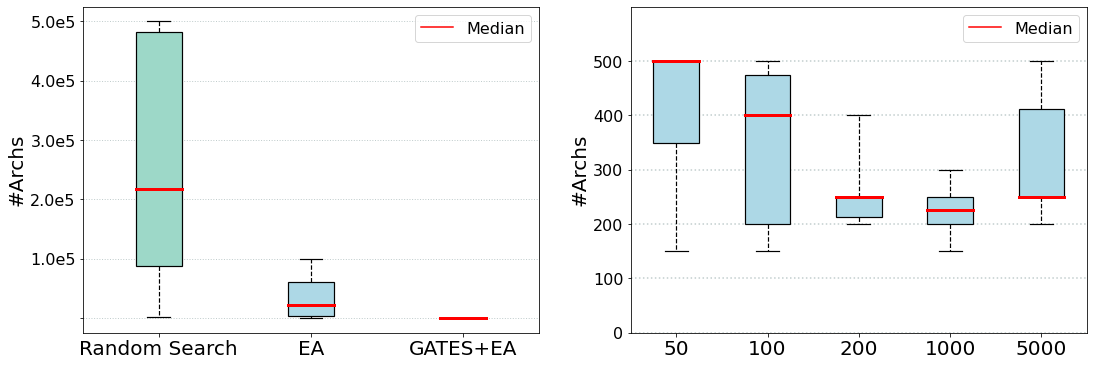

In [22]:



fig,ax = plt.subplots(1,2,figsize=[18.,6.])

PLOT_MEAN = False

with open("./gates/data/find_epochs.pkl","rb") as f:
    d1 = pickle.load(f)

rs_found = d1["rs_found"]
evo_found = d1["evo_found"]
gates_found = d1["gates_found"]

print(d1)


rs_found = np.array([
     31,  110,  160,  190,  231,  243,  321,  335,  429,  471,  638,
    751, 1001, 1007, 1026, 1028, 1129, 1154, 1202, 1235, 1339, 1387,
    1485, 1516, 1735, 1772, 1890, 1953, 1996, 2016, 2253, 2326, 2454,
    2489, 2509, 2620, 2744, 2942, 2992, 3056, 3082, 3308, 3572, 3585,
    3688, 3738, 3827, 3887, 4066, 4301, 4408, 4668, 4672, 4686, 4783,
    4911, 5061, 5437, 5458, 5613, 5979, 6269, 6283, 6380, 7316, 7446,
    7821, 7890, 8613, 9005, 9010, 9328, 9365, 9535, 9625, 9658, 9972
])*50
empty_rs = np.ones([100])*50*10000
empty_rs[:len(rs_found)] = rs_found
rs_found = empty_rs
# empty_rs[-1] = 50*10000

evo_found = np.array([
      8,    8,   10,   11,   12,   14,   15,   15,   16,   16,   19,
    23,   23,   28,   29,   31,   35,   38,   41,   41,   42,   44,
     44,   45,   52,   59,   62,   63,   69,   70,   78,   81,   84,    87,   96,  106,  108,  111,  113,  121,  121,  124,  137,  140,
     262,  474,  474,  474,  474,  394,  474,  581,  834, 1059, 1210,
     262,  474,  474,  474,  474,  394,  474,  581,  834, 1059, 1210,
    262,  474,  474,  474,  474,  394,  474,  581,  834, 1059, 1210,
     1250, 1456, 1471  
])*50
empty_evo = np.ones([100])*50*2000
empty_evo[:len(evo_found)] = evo_found
evo_found = empty_evo



print(len(rs_found))

print(evo_found)
print(gates_found)

print("----------The Medians-------------")
print(np.median(rs_found))
print(np.median(evo_found))
print(np.median(gates_found))


# plt.yscale("log")
if PLOT_MEAN:
    bplot = ax[0].boxplot([rs_found,evo_found,gates_found],\
                showfliers=True,patch_artist=True,\
                whis=15,autorange=True,\
                showmeans = True,meanline=True,\
               labels=["Random Search","EA","GATES+EA"])
else:
    bplot = ax[0].boxplot([rs_found,evo_found,gates_found],\
            showfliers=False,patch_artist=True,\
            whis=10,autorange=True,\
            showmeans = False,meanline=False,\
           labels=["Random Search","EA","GATES+EA"])
colors = ['#9dd8c8', 'lightblue', 'pink']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)  # 为不同的箱型图填充不同的颜色
ax[0].grid(axis="y",linestyle=':', linewidth='1', color='#c1cdcd')
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='x', which='major', labelsize=20)
# ax[0].set_xticks(range(0,450000,50000))
# ax[0].set_yticklabels([" "," ","5.0e4","1.0e5","1.5e5","2.0e5","2.5e5","3.0e5","3.5e5","4.0e5"])
ax[0].set_yticklabels(["","", "1.0e5","2.0e5","3.0e5","4.0e5","5.0e5"])
# ax[0].set_yscale("log")
# print(bplot.keys())
ax[0].set_ylabel("Methods",fontsize=20)
ax[0].set_ylabel("#Archs",fontsize=20)
if PLOT_MEAN:
    ax[0].legend(['mean', 'media'], loc='upper right')
else:
   ax[0].legend(['median'], loc='upper right') 

for whis in bplot["whiskers"]:
    # Whis being line2D Object
    whis.set_linewidth(1.2)
    whis.set_linestyle("--")
for cap in bplot["caps"]:
    # Whis being line2D Object
    cap.set_linewidth(1.2)
for box in bplot["boxes"]:
    box.set_linewidth(1.2)
if PLOT_MEAN:
    for mean in bplot["means"]:
        print(mean)
        mean.set_linewidth(1.5)
        mean.set_color("#f45905")
for median in bplot["medians"]:
    median.set_linewidth(3)
    median.set_color("red")
    
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# legend_elements = [Patch(facecolor='#f45905', edgecolor='r',
#                          label='Mean'),
#                    Patch(facecolor='red', edgecolor='r',
#                          label='Median'),
#                   ]
if PLOT_MEAN:
    legend_elements = [Line2D([0],[0],color="#f45905",linestyle="--",label="Mean"),
                       Line2D([0],[0],color="red",linestyle="-",label="Median"),
    ]
    ax[0].legend(handles=legend_elements, loc='upper right',fontsize=16)
else:
    legend_elements = [Line2D([0],[0],color="red",linestyle="-",label="Median"),
    ]
    ax[0].legend(handles=legend_elements, loc='upper right',fontsize=16)\

    
    

# At Epoch 4 (200+3*50) - 500 Archs
# Random Sample Num

## --------------------------------------------------------------------
    
# xs = np.array([10,100,1000,10000,100000])/5
# ys = np.array([0.94404,0.94712,0.95055,0.94792,0.94658])
# xs_2 = np.array([2,10,20,50,100,1000,10000])
# ys_2 = np.array([0.94404,0.94491,0.94558,0.95055,0.94895,0.94815,0.94404])
    
# ax[1].plot(xs,ys,label="GATES + Random Search",mew=3,marker="o",linestyle="--",linewidth='2',color="#1874cd")
# ax[1].plot(xs_2,ys_2,label="GATES + EA",mew=3,marker="o",linestyle="--",linewidth='2',color="#ff7315")
# ax[1].grid(axis="y",linestyle=':', linewidth='1', color='#c1cdcd')
# ax[1].legend(fontsize=16,loc=4)
# ax[1].tick_params(axis='both', which='major', labelsize=16)
# ax[1].set_xlabel("Sample Ratio",fontsize=20)
# ax[1].set_ylabel("Accuracy",fontsize=20)



# plt.xscale("log")

# plt.savefig("./gates/box.pdf")

## --------------------------------------------------------------------



d = {}

UNFOUND = 10


d["50"] =  [-1,10,6,-1,-1,-1,3,-1,-1,3]
d["100"] = [6,4,3,9,-1,-1,3,4,8,9,-1,-1,4,7,8]
d["200"] =  [5,4,4,5,4,5,5,5,8,5]
d["1000"] = [3,5,4,6,4,5,5,4,5,4]
d["5000"] = [4,5,-1,5,5,6,10,5,9,5]


for k in d.keys():
    d[k] =  [UNFOUND if i == -1 else i  for i in d[k]]

print(np.median(d["100"]))
d_items = [d[k] for k in d.keys()]

print(d_items)

bplot = ax[1].boxplot(d_items,\
            showfliers=False,patch_artist=True,\
            whis=1000,autorange=False,\
            showmeans = False,meanline=False,\
           labels=d.keys())

for patch in bplot['boxes']:
    patch.set_facecolor("lightblue")  # 为不同的箱型图填充不同的颜色
    
for whis in bplot["whiskers"]:
    # Whis being line2D Object
    whis.set_linewidth(1.2)
    whis.set_linestyle("--")
for cap in bplot["caps"]:
    # Whis being line2D Object
    cap.set_linewidth(1.2)
for box in bplot["boxes"]:
    box.set_linewidth(1.2)
for median in bplot["medians"]:
    median.set_linewidth(3)
    median.set_color("red")
    
ax[1].grid(axis="y",linestyle=':', linewidth='1.5', color='#c1cdcd')
ax[1].tick_params(axis='y', which='major', labelsize=16)

ax[1].tick_params(axis='x', which='major', labelsize=20)
# ax[0].set_xticks(range(0,450000,50000))
ax[1].set_ylim([0,12])
ax[1].set_yticks(np.arange(0,12,2))
ax[1].set_yticklabels(list(np.arange(0,1300,100)))
# ax[0].set_yscale("log")
ax[1].set_ylabel("#Archs",fontsize=20)

legend_elements = [Line2D([0],[0],color="red",linestyle="-",label="Median"),
]
ax[1].legend(handles=legend_elements, loc='upper right',fontsize=16)\

plt.savefig("./gates/ablation.pdf")

    

    

In [ ]:
 <strategy first> Primal module `stem.conv` for ['stem.conv', 'layer1.0.op_2.conv', 'layer1.1.op_2.conv']
  41 <strategy first> Primal module `layer1.0.op_1.conv` for ['layer1.0.op_1.conv']
  42 <strategy first> Primal module `layer1.1.op_1.conv` for ['layer1.1.op_1.conv']
  43 <strategy first> Primal module `layer2.0.skip_op.conv` for ['layer2.0.skip_op.conv', 'layer2.0.op_2.conv', 'layer2.1.op_2.conv']
  44 <strategy first> Primal module `layer2.0.op_1.conv` for ['layer2.0.op_1.conv']
  45 <strategy first> Primal module `layer2.1.op_1.conv` for ['layer2.1.op_1.conv']
  46 <strategy first> Primal module `layer3.0.skip_op.conv` for ['layer3.0.skip_op.conv', 'layer3.0.op_2.conv', 'layer3.1.op_2.conv']
  47 <strategy first> Primal module `layer3.0.op_1.conv` for ['layer3.0.op_1.conv']
  48 <strategy first> Primal module `layer3.1.op_1.conv` for ['layer3.1.op_1.conv']
  49 <strategy first> Primal module `layer4.0.skip_op.conv` for ['layer4.0.skip_op.conv', 'layer4.0.op_2.conv', 'layer4.1.op_2.conv']
  50 <strategy first> Primal module `layer4.0.op_1.conv` for ['layer4.0.op_1.conv']
  51 <strategy first> Primal module `layer4.1.op_1.conv` for ['layer4.1.op_1.conv']



No handles with labels found to put in legend.


dict_keys(['prob_var', 'train_loss', 'computation_loss', 'train_acc', 'test_acc', 'sparisty', 'alphas', 'expected_sparisty', 'expected_alphas', 'c_grad', 't_grad'])
522
(520, 12)


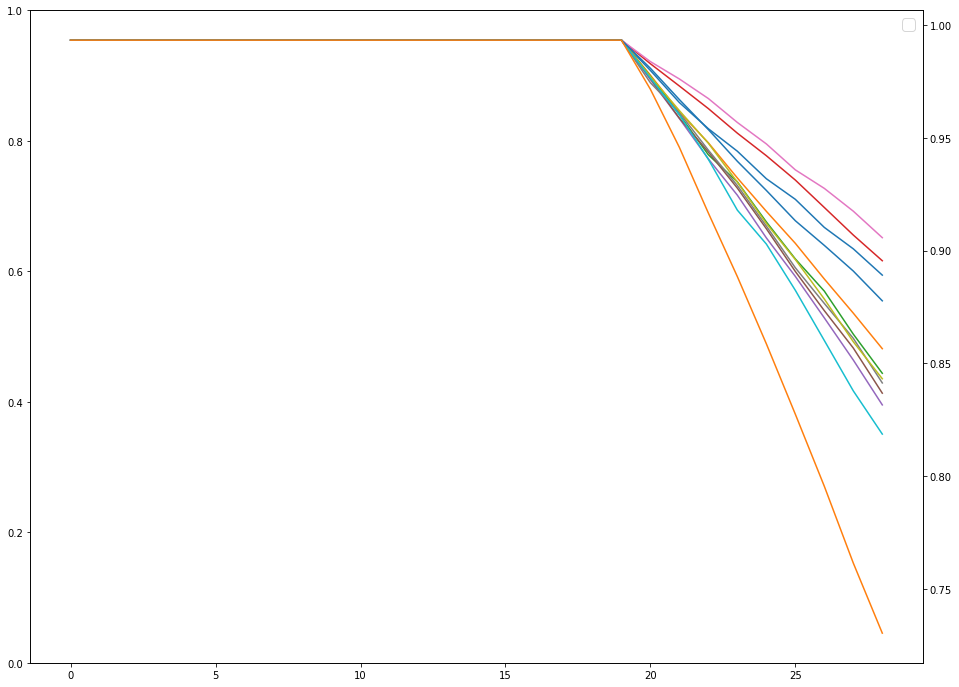

In [199]:
import torch

comp_names = ["stem.conv",
              "layer1.0.op_1.conv",
              "layer1.1.op_1.conv",
              "layer2.0.skip_op.conv",
              "layer2.0.op_1.conv",
              "layer2.1.op_1.conv",
              "layer3.0.skip_op.conv",
              "layer3.0.op_1.conv",
              "layer3.1.op_1.conv",
              "layer4.0.skip_op.conv",
              "layer4.0.op_1.conv",
              "layer4.1.op_1.conv",
             ]


x = torch.load("./plot_finetune.t7", map_location=torch.device("cpu"))
print(x.keys())


print(len(x["t_grad"]))
x["t_grad"] = x["t_grad"][:520]

# t_grads_ = np.array(x["t_grad"]).reshape(30,-1,12).mean(axis=1)
t_grads_ = np.array(x["t_grad"]).reshape(-1,12)
# print(np.array(x["t_grad"]).reshape(30,-1).mean(axis=1))
# print(x["alphas"][0])
print(t_grads_.shape)

t_grads = t_grads_
rank_t_grads= np.zeros(t_grads.shape)
num_comp = t_grads.shape[-1]
rank_t_grads[np.tile(np.arange(t_grads.shape[0])[:, None], \
                     (1, num_comp)), np.argsort(np.abs(t_grads), axis=-1)] = np.arange(num_comp)
# print(rank_t_grads.shape)

x["alphas"] = x["alphas"][:30]
x["expected_alphas"] = x["expected_alphas"][:29]
x["expected_sparisty"] = x["expected_sparisty"][:29]



x["expected_alphas"] = [item.detach() for item in x["expected_alphas"]]
x["expected_sparisty"] = [item.detach() for item in x["expected_sparisty"]]


fig,ax = plt.subplots(figsize=[16.,12.])
ax2 = ax.twinx()


alphas_ = np.zeros([len(x["alphas"]),len(x["alphas"][0])])
rank_t_grads_ = np.array([9,  8,  8,  9, 10, 9, 10,  9,  9,  9,  8,  9,  9, 10,\
                 10, 10,  10, 10, 10, 10, 11, 11, 11, 10, 10, 10, 10, 10,\
                 11, 11])

expec_alphas_ = np.zeros([len(x["expected_alphas"]),len(x["expected_alphas"][0])])
# expec_sparsity_ = np.zeros([len(x["expected_sparisty"]),len(x["expected_sparisty"][0])])

# print(alphas_.shape)
for idx, alphas in enumerate(x["alphas"]):
    alphas_[idx] = alphas

for idx, expec_alpha in enumerate(x["expected_alphas"]):
    expec_alphas_[idx] = expec_alpha
    

for idx, alphas in enumerate(range(alphas_.shape[1])):
    # print(idx, alphas_[:,idx].shape)
    pass
#     if (idx == 11):
#         plt.plot(alphas_[:,idx], label=str(idx)+"-"+comp_names[idx])
#         plt.plot(0.1*rank_t_grads[:,idx])
#         ax2.plot(expec_sparsity_[:,idx],marker="+",mew=3)
#     if (idx == 3):
#         alphas_[:,idx][4] = alphas_[:,idx][4] - 0.03
#         ax.plot(alphas_[:,idx], label=str(idx)+"-"+comp_names[idx])
#         # ax2.plot(rank_t_grads_,marker="+",mew=3)
#         # ax2.plot(rank_t_grads[:,idx],marker="+",mew=3)

plt.plot(expec_alphas_)

    
plt.legend(fontsize=16)







In [12]:
x = np.random.randint(0,10,20)
x

array([7, 9, 4, 3, 5, 7, 4, 4, 8, 9, 5, 1, 8, 8, 5, 1, 0, 7, 5, 7])